In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset

data = pd.read_csv('house_rent.csv')

print(data.head())
print(data.describe())
print(data.dtypes)
print(data.shape)









   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  
       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   
50%    326.000000  1423.200000    5.000000   

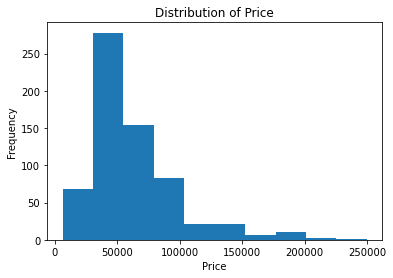

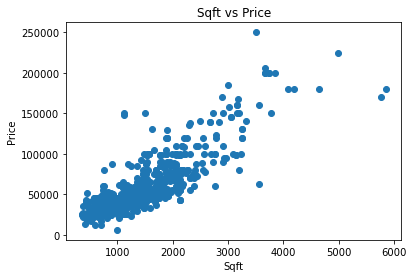

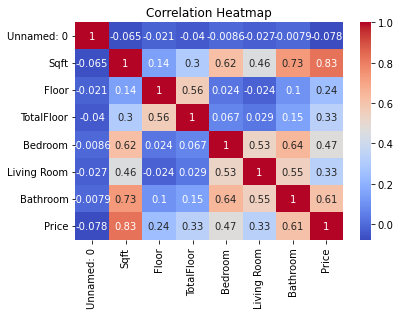

In [4]:
# Example visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the 'Price' column
plt.hist(data['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

# Scatter plot of 'Sqft' vs 'Price'
plt.scatter(data['Sqft'], data['Price'])
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Sqft vs Price')
plt.show()

# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




In [5]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Create and fit the KNN regressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


Mean Squared Error: 444341095.2750387
R-squared Score: 0.6903446844118265


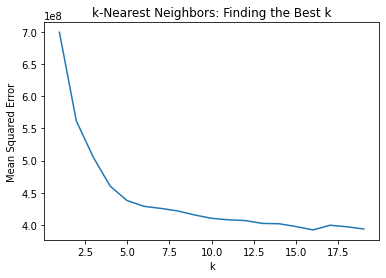

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Define a range of k values to test
k_values = range(1, 20)

# Perform cross-validation for each k value and calculate the mean squared error
mse_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse_scores.append(mse)

# Plot the mean squared error for each k value
plt.plot(k_values, mse_scores)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('k-Nearest Neighbors: Finding the Best k')
plt.show()
